In [1]:
# load common settings for tidy notebooks
%run workshop_commons.ipynb

## Hadron Capabilities Overview
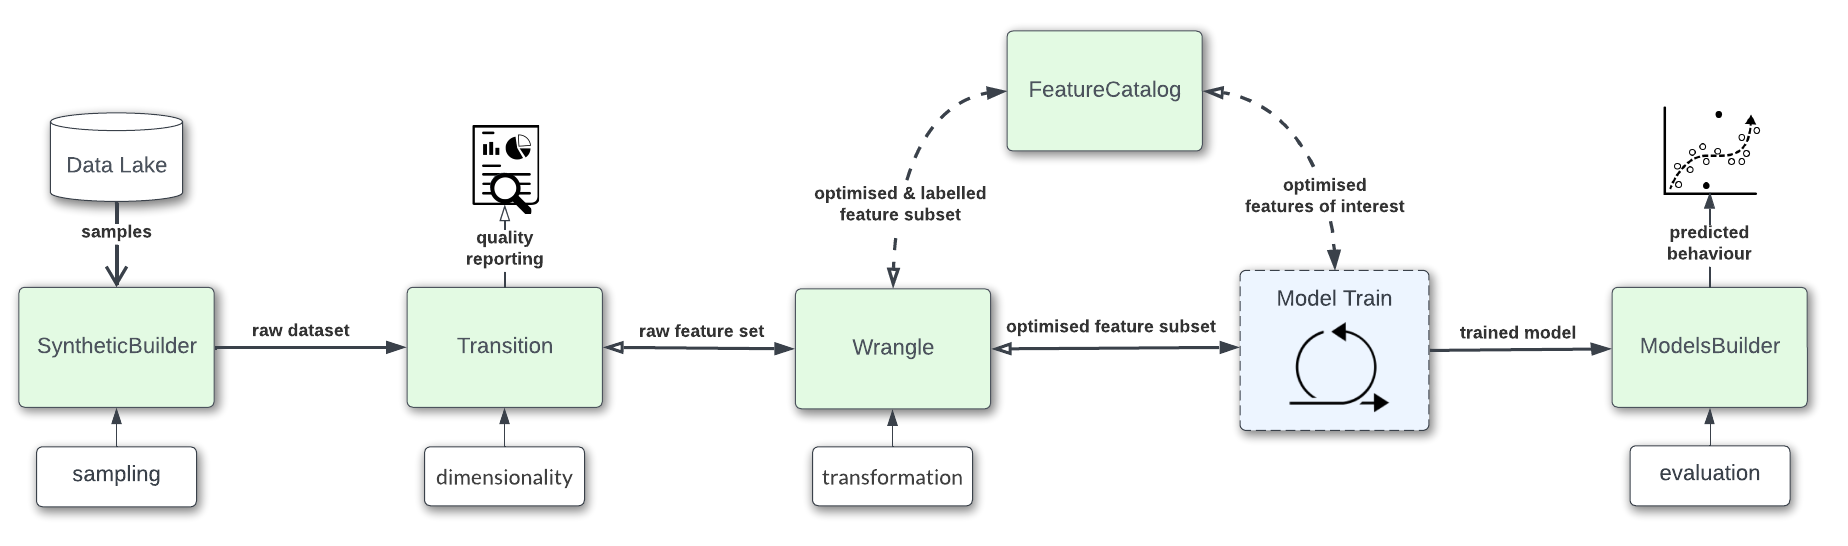

## SyntheticBuilder

In [2]:
from ds_discovery import SyntheticBuilder

In [3]:
# create or instance
sb = SyntheticBuilder.from_memory()

In [4]:
sb.set_persist()

## Transition

In [11]:
from ds_discovery import Transition

In [12]:
# create or instance
tr = Transition.from_env('workshop_1', has_contract=False)

In [13]:
# set how and where data is to be sourced and persisted. 
tr.set_source_uri('https://raw.githubusercontent.com/project-hadron/hadron-asset-bank/master/datasets/hello_hadron/USA_Housing.csv')
tr.set_persist()

In [14]:
# load the data from source. The source handler is read only to protect the sourced data
df = tr.load_source_canonical()
df.shape

(5000, 7)

In [15]:
# df = tr.tools.auto_transition(df)

In [16]:
# same the canonical to disk. The persist handler is both read and write
tr.save_persist_canonical(df)

## Wrangle

In [17]:
from ds_discovery import Wrangle, Transition

In [18]:
# create or instance
wr = Wrangle.from_env('workshop_1', has_contract=False)

In [19]:
# set how and where data is to be sourced and persisted. 
wr.set_source_contract(Transition.from_env('workshop_1').get_persist_contract())
wr.set_persist()

In [20]:
# load the data from source. The source handler is read only to protect the sourced data
df_features = wr.load_source_canonical()
df_features.shape

(5000, 7)

In [ ]:
wr.tools.

In [21]:
# This time run the component, loading the source data and persisting it once the component's task is complete
wr.run_component_pipeline()

In [22]:
# reload the persisted data to view it ran
df_transformed = wr.load_persist_canonical()
df_transformed.shape

(5000, 7)

### Common Reports

In [23]:
# observing our connector handlers
wr.report_connectors()

,connector_name,uri,module_name,handler,version,kwargs,query,aligned
0,pm_wrangle_workshop_1,{PWD}/metadata/contracts/workshop/hadron_pm_wrangle_workshop_1.json,ds_discovery.handlers.pandas_handlers,PandasPersistHandler,v0.00,,,False
1,primary_source,{PWD}/metadata/data/workshop/hadron_transition_workshop_1_primary_persist.pickle,ds_discovery.handlers.pandas_handlers,PandasPersistHandler,v0.00,,,False
2,primary_persist,{PWD}/metadata/data/workshop/hadron_wrangle_workshop_1_primary_persist.pickle,ds_discovery.handlers.pandas_handlers,PandasPersistHandler,v0.00,,,True
